In [455]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aapllll/AAPL.csv


In [456]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [457]:
Data = pd.read_csv("../input/aapllll/AAPL.csv")

In [458]:
Data.isnull().sum()

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [459]:
Data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [460]:
Data.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [461]:
Data.duplicated().sum()

0

In [462]:
df1 = Data.reset_index()['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [463]:
df1_ML = Data.reset_index()['close']

In [464]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [465]:
scaler_ML=MinMaxScaler(feature_range=(0,1))
df1_ML=scaler_ML.fit_transform(np.array(df1_ML).reshape(-1,1))
df1_ML

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

**Train-Test split for time series data**

In [466]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]
print(len(test_data))



441


In [467]:
training_size_ML=int(len(df1_ML)*0.65)
test_size_ML=len(df1_ML)-training_size_ML
train_data_ML,test_data_ML=df1_ML[0:training_size_ML,:],df1_ML[training_size_ML:len(df1_ML),:]
print(len(test_data_ML))

441


In [468]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [469]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [470]:
time_step = 100
X_train_ML, y_train_ML = create_dataset(train_data_ML, time_step)
X_test_ML, y_test_ML = create_dataset(test_data_ML, time_step)

In [471]:
X_train.shape

(716, 100)

In [475]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [476]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [477]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [478]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [479]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [480]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 333ms/step - loss: 0.0233 - val_loss: 0.0636
Epoch 2/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 3/100
12/12 [==============================] - 3s 230ms/step - loss: 0.0011 - val_loss: 0.0050
Epoch 4/100
12/12 [==============================] - 3s 226ms/step - loss: 7.7684e-04 - val_loss: 0.0044
Epoch 5/100
12/12 [==============================] - 3s 235ms/step - loss: 5.9734e-04 - val_loss: 0.0051
Epoch 6/100
12/12 [==============================] - 3s 239ms/step - loss: 6.3247e-04 - val_loss: 0.0051
Epoch 7/100
12/12 [==============================] - 3s 230ms/step - loss: 6.2635e-04 - val_loss: 0.0046
Epoch 8/100
12/12 [==============================] - 3s 224ms/step - loss: 6.1769e-04 - val_loss: 0.0043
Epoch 9/100
12/12 [==============================] - 3s 224ms/step - loss: 6.1685e-04 - val_loss: 0.0046
Epoch 10/100
12/12 [==============================] - 3s 230ms/ste

In [481]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [482]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [483]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.13928226698098

In [484]:
math.sqrt(mean_squared_error(ytest,test_predict))

237.59878727285533

In [485]:
testPredictPlot.shape

(1258, 1)

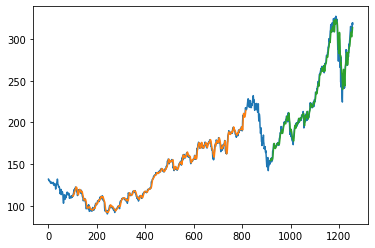

In [486]:
import matplotlib.pyplot as plt
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [487]:
trainPredictPlot.shape

(1258, 1)

In [488]:
len(test_data)
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [489]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [490]:
len(temp_input)

100

In [491]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    



[0.9484991]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [493]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

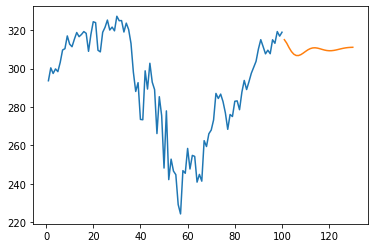

In [495]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

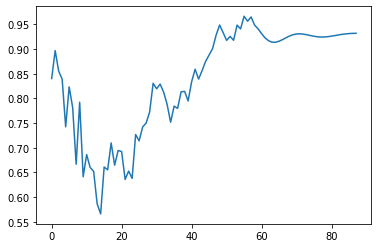

In [496]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

**MACHINE LEARNING MODELS**

In [497]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression


In [516]:
model_params = {
    'svm': {
        'model': svm.LinearSVR(max_iter=1000),
        'params' : {
            'C': [1,10,20,30,40],
            'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
        }  
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [2500]
        }
    },
 
    'linear_regression' : {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.00001],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion' : ['mse','friedman_mse','mae', 'poisson'],
            'splitter': ['best','random']
        }
    },
    'Ridge' : {
        'model' : Ridge(),
        'params' : {
            'alpha' : [1,2,15,20],
            'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
            }
                      
          
               
        }}

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3,return_train_score=False)
    clf.fit(X_train_ML,y_train_ML)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
ML_result = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(ML_result)

               model  best_score  \
0                svm    0.966805   
1      random_forest   -0.296258   
2  linear_regression    0.964441   
3              lasso    0.971999   
4      decision_tree   -0.274023   
5              Ridge    0.835195   

                                         best_params  
0            {'C': 1, 'loss': 'epsilon_insensitive'}  
1                             {'n_estimators': 2500}  
2                               {'normalize': False}  
3            {'alpha': 1e-05, 'selection': 'cyclic'}  
4  {'criterion': 'friedman_mse', 'splitter': 'best'}  
5                {'alpha': 1, 'solver': 'sparse_cg'}  


In [499]:
lasso = Lasso(alpha= 0.00001,selection= 'cyclic')
lasso.fit(X_train_ML,y_train_ML)


Lasso(alpha=1e-05)

In [500]:
X_train_ML.shape

(716, 100)

In [501]:
train_predict_ML=lasso.predict(X_train_ML)
test_predict_ML=lasso.predict(X_test_ML)


In [502]:
X_train_ML.shape

(716, 100)

In [503]:
train_predict_ML = np.array(train_predict_ML).reshape(-1,1)
test_predict_ML = np.array(test_predict_ML).reshape(-1,1)

In [504]:
y_train_ML.shape

(716,)

In [505]:
train_predict_ML=scaler_ML.inverse_transform(train_predict_ML)
test_predict_ML=scaler_ML.inverse_transform(test_predict_ML)
train_predict_ML


array([[111.96904123],
       [111.16773855],
       [111.90242587],
       [113.94855189],
       [113.93058724],
       [115.63593108],
       [119.13772106],
       [115.42853244],
       [114.67682173],
       [119.33145676],
       [120.6131992 ],
       [119.59121028],
       [121.28987747],
       [122.67461383],
       [122.0986155 ],
       [121.02965501],
       [121.17508203],
       [120.65801662],
       [116.89744181],
       [116.26555066],
       [115.85724467],
       [112.52491915],
       [114.33611324],
       [113.84021982],
       [117.38300349],
       [118.82383777],
       [119.34631398],
       [117.82335486],
       [118.92659473],
       [118.09342728],
       [117.88180534],
       [118.36649096],
       [117.40988877],
       [116.37935656],
       [115.29449491],
       [119.07550748],
       [118.29110189],
       [118.24810189],
       [115.66451113],
       [116.23880255],
       [113.31420061],
       [112.62230043],
       [110.67290193],
       [111

In [507]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train_ML,train_predict_ML))

142.13072874492977

In [508]:
math.sqrt(mean_squared_error(y_test_ML,test_predict_ML))

238.08409654968415

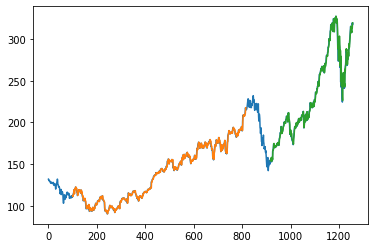

In [509]:
import matplotlib.pyplot as plt
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot_ML = np.empty_like(df1_ML)
trainPredictPlot_ML[:, :] = np.nan
trainPredictPlot_ML[look_back:len(train_predict_ML)+look_back, :] = train_predict_ML
# shift test predictions for plotting
testPredictPlot_ML = np.empty_like(df1_ML)
testPredictPlot_ML[:, :] = np.nan
testPredictPlot_ML[len(train_predict_ML)+(look_back*2)+1:len(df1_ML)-1, :] = test_predict_ML
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1_ML))
plt.plot(trainPredictPlot_ML)
plt.plot(testPredictPlot_ML)
plt.show()

In [510]:
df1_ML.shape

(1258, 1)

In [511]:
len(test_data_ML)
x_input=test_data_ML[341:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()



In [512]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps))
        yhat = lasso.predict(x_input)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = lasso.predict(x_input)
        print(yhat[0])
        temp_input.append(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0.9656187666778404
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782

In [513]:
lst_output = np.array(lst_output).reshape(-1,1)

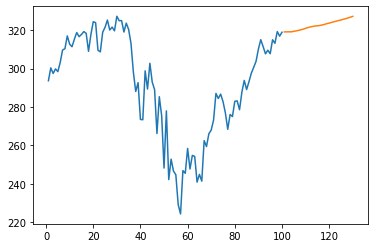

In [514]:
plt.plot(day_new,scaler_ML.inverse_transform(df1_ML[1158:]))
plt.plot(day_pred,scaler_ML.inverse_transform(lst_output))

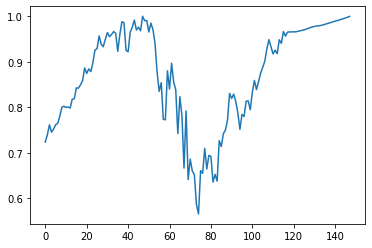

In [515]:
df3_ML=df1_ML.tolist()
df3_ML.extend(lst_output)
plt.plot(df3_ML[1140:])